Попытка выполнить ДЗ на все уровни
# 1. Задача минимум

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib

# эстетики ради
import seaborn as sns
sns.set() 

In [62]:
from sklearn.linear_model import LinearRegression

In [50]:
country_data = pd.read_csv('country_data.csv', parse_dates = ['report_dt'])
country_data.head()

,metric,report_dt,val
0,universalis,2014-04-30,84164707.49
1,universalis,2014-03-31,86227448.43
2,universalis,2014-05-31,91671353.24
3,universalis,2014-06-30,93404685.57
4,universalis,2014-09-30,97891616.71


In [87]:
data = country_data.drop('metric', axis =1).set_index('report_dt').sort_index().squeeze()

In [88]:
data

report_dt
2014-03-31    8.622745e+07
2014-04-30    8.416471e+07
2014-05-31    9.167135e+07
2014-06-30    9.340469e+07
2014-07-31    1.005175e+08
2014-08-31    1.037964e+08
2014-09-30    9.789162e+07
2014-10-31    1.056194e+08
2014-11-30    1.054549e+08
2014-12-31    1.289504e+08
2015-01-31    1.113378e+08
2015-02-28    1.074631e+08
2015-03-31    1.213251e+08
2015-04-30    1.214242e+08
2015-05-31    1.229587e+08
2015-06-30    1.314021e+08
2015-07-31    1.388567e+08
2015-08-31    1.405062e+08
2015-09-30    1.378141e+08
2015-10-31    1.473062e+08
2015-11-30    1.450877e+08
2015-12-31    1.724531e+08
2016-01-31    1.490172e+08
2016-02-28    1.421298e+08
2016-03-31    1.643927e+08
2016-04-30    1.633035e+08
2016-05-31    1.706107e+08
2016-06-30    1.744829e+08
2016-07-31    1.876438e+08
2016-08-31    1.874465e+08
2016-09-30    1.830529e+08
2016-10-31    1.972240e+08
2016-11-30    1.966519e+08
2016-12-31    2.326180e+08
2017-01-31    1.978598e+08
2017-02-28    1.871106e+08
2017-03-31    2.19

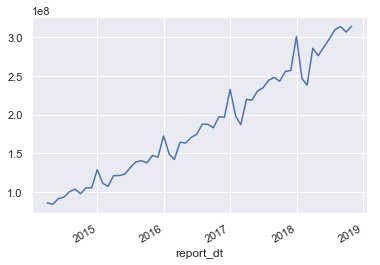

In [52]:
data.plot()
plt.show()

In [53]:
clear_data = data.to_frame('y').reset_index().reset_index()
clear_data

,index,report_dt,y
0,0,2014-03-31,8.622745e+07
1,1,2014-04-30,8.416471e+07
2,2,2014-05-31,9.167135e+07
3,3,2014-06-30,9.340469e+07
4,4,2014-07-31,1.005175e+08
5,5,2014-08-31,1.037964e+08
6,6,2014-09-30,9.789162e+07
7,7,2014-10-31,1.056194e+08
8,8,2014-11-30,1.054549e+08
9,9,2014-12-31,1.289504e+08


In [54]:
test = clear_data.iloc[-6:]

# в обучающую выборку попадают все точки, кроме имеющихся в тестовой выборке
train = clear_data[~clear_data.index.isin(test.index)]

In [89]:
X_train = train['index'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['index'].values.reshape(-1,1)
y_test = test['y'].values.reshape(-1,1)

In [90]:
lr = LinearRegression()

In [95]:
lr.fit(X_train, y_train);

In [96]:
y_predict = lr.predict(X_test)

In [97]:
y_predict

array([[2.74888027e+08],
       [2.78900923e+08],
       [2.82913820e+08],
       [2.86926717e+08],
       [2.90939613e+08],
       [2.94952510e+08]])

In [100]:
y_test

array([[2.87130365e+08],
       [2.97621796e+08],
       [3.09679904e+08],
       [3.13615203e+08],
       [3.06695299e+08],
       [3.13927760e+08]])

In [101]:
y_predict_plt = [x for l in y_predict for x in l]
y_predict_plt

[274888026.627151,
 278900923.3331256,
 282913820.0391001,
 286926716.7450747,
 290939613.45104927,
 294952510.1570238]

In [102]:
y_test_plt = [x for l in y_test for x in l]
y_test_plt

[287130364.6, 297621796.5, 309679903.8, 313615203.1, 306695298.8, 313927760.3]

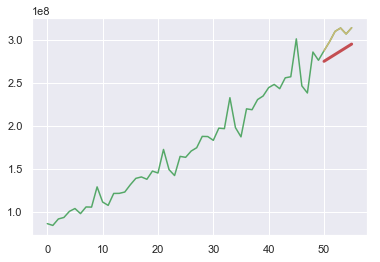

In [128]:
plt.plot(clear_data['index'],clear_data['y'],color = 'g')
plt.plot(X_test,y_test_plt, color = 'y');
plt.plot(X_test, y_predict_plt, color = 'r',linewidth = 3);

In [111]:
mape = (abs(y_test-y_predict)/y_test).mean()
mape

0.06481440188610257

# 2. Задача на средний уровень

In [180]:
clear_data_2 = clear_data.copy()
clear_data_2.rename(columns={'index':'x'}, inplace=True)
clear_data_2.head()

,x,report_dt,y
0,0,2014-03-31,8.622745e+07
1,1,2014-04-30,8.416471e+07
2,2,2014-05-31,9.167135e+07
3,3,2014-06-30,9.340469e+07
4,4,2014-07-31,1.005175e+08


In [176]:
def update_x(x):
    return x + 1
def add_columns(data_):
    data = data_.copy()
    data['x'] = update_x(data['x'])
    data['x^2'] = data['x']**2
    data['x^3'] = data['x']**3
    return data

In [181]:
clear_data_2.head()

,x,report_dt,y
0,0,2014-03-31,8.622745e+07
1,1,2014-04-30,8.416471e+07
2,2,2014-05-31,9.167135e+07
3,3,2014-06-30,9.340469e+07
4,4,2014-07-31,1.005175e+08


In [184]:
data_with_dif_x = add_columns(clear_data_2)
data_with_dif_x.head()

,x,report_dt,y,x^2,x^3
0,1,2014-03-31,8.622745e+07,1,1
1,2,2014-04-30,8.416471e+07,4,8
2,3,2014-05-31,9.167135e+07,9,27
3,4,2014-06-30,9.340469e+07,16,64
4,5,2014-07-31,1.005175e+08,25,125


In [199]:
month = pd.DatetimeIndex(data_with_dif_x['report_dt']).month

In [200]:
month

Int64Index([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
             8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
             1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10],
           dtype='int64', name='report_dt')

In [207]:
def add_month(data_):
    data = data_.copy()
    data = data.join(pd.get_dummies(month))
    return data

data_with_month = add_month(data_with_dif_x)

In [209]:
data_with_month.head()

,x,report_dt,y,x^2,x^3,1,2,3,4,5,6,7,8,9,10,11,12
0,1,2014-03-31,8.622745e+07,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,2,2014-04-30,8.416471e+07,4,8,0,0,0,1,0,0,0,0,0,0,0,0
2,3,2014-05-31,9.167135e+07,9,27,0,0,0,0,1,0,0,0,0,0,0,0
3,4,2014-06-30,9.340469e+07,16,64,0,0,0,0,0,1,0,0,0,0,0,0
4,5,2014-07-31,1.005175e+08,25,125,0,0,0,0,0,0,1,0,0,0,0,0


In [256]:
data_with_month_test = data_with_month.iloc[-6:]

data_with_month_train = data_with_month[~data_with_month.index.isin(data_with_month_test.index)]

In [258]:
data_with_month_train

,x,report_dt,y,x^2,x^3,1,2,3,4,5,6,7,8,9,10,11,12
0,1,2014-03-31,8.622745e+07,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,2,2014-04-30,8.416471e+07,4,8,0,0,0,1,0,0,0,0,0,0,0,0
2,3,2014-05-31,9.167135e+07,9,27,0,0,0,0,1,0,0,0,0,0,0,0
3,4,2014-06-30,9.340469e+07,16,64,0,0,0,0,0,1,0,0,0,0,0,0
4,5,2014-07-31,1.005175e+08,25,125,0,0,0,0,0,0,1,0,0,0,0,0
5,6,2014-08-31,1.037964e+08,36,216,0,0,0,0,0,0,0,1,0,0,0,0
6,7,2014-09-30,9.789162e+07,49,343,0,0,0,0,0,0,0,0,1,0,0,0
7,8,2014-10-31,1.056194e+08,64,512,0,0,0,0,0,0,0,0,0,1,0,0
8,9,2014-11-30,1.054549e+08,81,729,0,0,0,0,0,0,0,0,0,0,1,0
9,10,2014-12-31,1.289504e+08,100,1000,0,0,0,0,0,0,0,0,0,0,0,1


In [259]:
lr2 = LinearRegression()

In [260]:
X_train_2 = data_with_month_train.drop(['report_dt', 'y'], axis=1)
X_test_2 = data_with_month_test.drop(['report_dt', 'y'], axis=1)
y_train_2 = data_with_month_train['y']
y_test_2 = data_with_month_test['y']

In [261]:
lr2.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [262]:
y_predict_2 = lr2.predict(X_test_2)
y_predict_2

array([2.87011880e+08, 2.93035631e+08, 3.03838148e+08, 3.07346100e+08,
       3.04219615e+08, 3.16549093e+08])

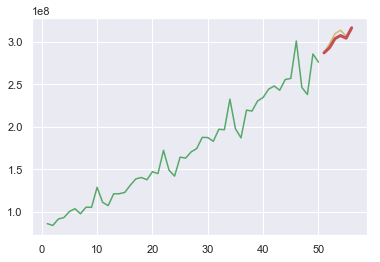

In [272]:
plt.plot(data_with_month_train['x'],data_with_month_train['y'], color = 'g');
plt.plot(X_test_2['x'],y_test_2, color = 'y');
plt.plot(X_test_2['x'], y_predict_2, color = 'r',linewidth = 3);

In [454]:
mape = (abs(y_test_2-y_predict_2)/y_test_2).mean()
mape

0.011849651752926025

# 3. Задача максимум
Вместо прогнозирования абсолютных значений можно прогнозировать относительные приросты (они более стабильны). После прогнозирования приростов необходимо куммулятивно восстановить изначальные значения через pd.cumprod

Ответы отправить через форму Google Опросы https://forms.gle/83XzC5Xq3rK1xESg7

In [436]:
clear_data_3 = data_with_month_train.copy()
clear_data_3['y_old'] = clear_data_3['y']
clear_data_3.head()

,x,report_dt,y,x^2,x^3,1,2,3,4,5,6,7,8,9,10,11,12,y_old
0,1,2014-03-31,8.622745e+07,1,1,0,0,1,0,0,0,0,0,0,0,0,0,8.622745e+07
1,2,2014-04-30,8.416471e+07,4,8,0,0,0,1,0,0,0,0,0,0,0,0,8.416471e+07
2,3,2014-05-31,9.167135e+07,9,27,0,0,0,0,1,0,0,0,0,0,0,0,9.167135e+07
3,4,2014-06-30,9.340469e+07,16,64,0,0,0,0,0,1,0,0,0,0,0,0,9.340469e+07
4,5,2014-07-31,1.005175e+08,25,125,0,0,0,0,0,0,1,0,0,0,0,0,1.005175e+08


In [439]:
def increase_y(data):
    clear_data_3 = data.copy()
    for i in range(len(clear_data_3)):
        if i == 0:
            clear_data_3['y'][i] = clear_data_3['y'][i] / clear_data_3['y'][i]
            continue
        clear_data_3['y'][i] = clear_data_3['y'][i] / data['y'][i-1]
    return clear_data_3

In [440]:
clear_data_3 = increase_y(clear_data_3)

c:\users\nikit0z\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\nikit0z\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [441]:
clear_data_3

,x,report_dt,y,x^2,x^3,1,2,3,4,5,6,7,8,9,10,11,12,y_old
0,1,2014-03-31,1.000000,1,1,0,0,1,0,0,0,0,0,0,0,0,0,8.622745e+07
1,2,2014-04-30,0.976078,4,8,0,0,0,1,0,0,0,0,0,0,0,0,8.416471e+07
2,3,2014-05-31,1.089190,9,27,0,0,0,0,1,0,0,0,0,0,0,0,9.167135e+07
3,4,2014-06-30,1.018908,16,64,0,0,0,0,0,1,0,0,0,0,0,0,9.340469e+07
4,5,2014-07-31,1.076150,25,125,0,0,0,0,0,0,1,0,0,0,0,0,1.005175e+08
5,6,2014-08-31,1.032620,36,216,0,0,0,0,0,0,0,1,0,0,0,0,1.037964e+08
6,7,2014-09-30,0.943112,49,343,0,0,0,0,0,0,0,0,1,0,0,0,9.789162e+07
7,8,2014-10-31,1.078942,64,512,0,0,0,0,0,0,0,0,0,1,0,0,1.056194e+08
8,9,2014-11-30,0.998443,81,729,0,0,0,0,0,0,0,0,0,0,1,0,1.054549e+08
9,10,2014-12-31,1.222802,100,1000,0,0,0,0,0,0,0,0,0,0,0,1,1.289504e+08


In [442]:
clear_data_3_test = clear_data_3.iloc[-6:]

clear_data_3_train = clear_data_3[~clear_data_3.index.isin(clear_data_3_test.index)]

In [443]:
X_train_3 = clear_data_3_train.drop(['report_dt', 'y_old','y'], axis=1)
X_test_3 = clear_data_3_test.drop(['report_dt', 'y_old','y'], axis=1)

y_train_3 = clear_data_3_train['y']
y_test_3 = clear_data_3_test['y']

In [444]:
X_test_3

,x,x^2,x^3,1,2,3,4,5,6,7,8,9,10,11,12
44,45,2025,91125,0,0,0,0,0,0,0,0,0,0,1,0
45,46,2116,97336,0,0,0,0,0,0,0,0,0,0,0,1
46,47,2209,103823,1,0,0,0,0,0,0,0,0,0,0,0
47,48,2304,110592,0,1,0,0,0,0,0,0,0,0,0,0
48,49,2401,117649,0,0,1,0,0,0,0,0,0,0,0,0
49,50,2500,125000,0,0,0,1,0,0,0,0,0,0,0,0


In [445]:
lr3 = LinearRegression()

In [446]:
lr3.fit(X_train_3, y_train_3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [447]:
y_predict_3 = lr3.predict(X_test_3)
y_predict_3

array([0.99762391, 1.20496579, 0.86952813, 0.96891174, 1.14269066,
       1.0226079 ])

In [448]:
y_test_3

44    1.004841
45    1.171350
46    0.818541
47    0.966435
48    1.199933
49    0.966461
Name: y, dtype: float64

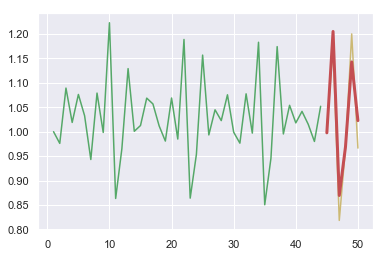

In [451]:
plt.plot(clear_data_3_train['x'],clear_data_3_train['y'], color = 'g');
plt.plot(X_test_3['x'],y_test_3, color = 'y');
plt.plot(X_test_3['x'], y_predict_3, color = 'r',linewidth = 3);

# Вот здесь посчитала mape3, получилось больше, чем mape2....

In [455]:
mape = (abs(y_test_3-y_predict_3)/y_test_3).mean()
mape

0.03442226777052085

In [462]:
y = clear_data_3['y'][:-6].append(pd.DataFrame(y_predict_3), ignore_index=True)
y
#y.cumprod()

,0
0,1.000000
1,0.976078
2,1.089190
3,1.018908
4,1.076150
5,1.032620
6,0.943112
7,1.078942
8,0.998443
9,1.222802


In [494]:
y1 =  y.cumprod()
y1

,0
0,1.000000
1,0.976078
2,1.063134
3,1.083236
4,1.165725
5,1.203751
6,1.135272
7,1.224893
8,1.222985
9,1.495468


In [495]:
#ЗНАЧЕНИЯ ТУТ!
y_new = y1 * clear_data_3['y_old'][0]
y_new

,0
0,8.622745e+07
1,8.416471e+07
2,9.167135e+07
3,9.340469e+07
4,1.005175e+08
5,1.037964e+08
6,9.789162e+07
7,1.056194e+08
8,1.054549e+08
9,1.289504e+08
